Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de prueba: (10000, 28, 28)


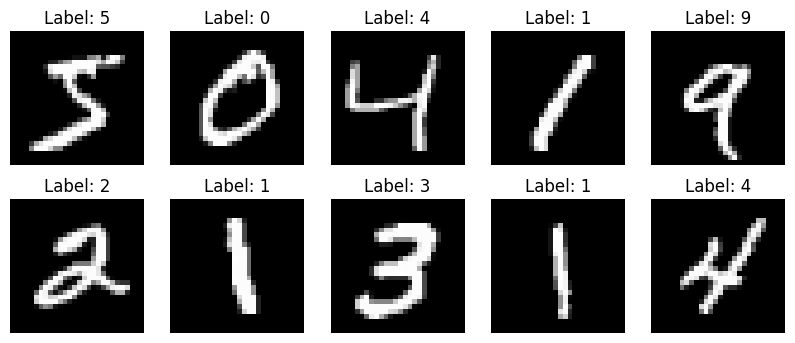

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9203 - loss: 0.2793 - val_accuracy: 0.9602 - val_loss: 0.1380
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9627 - loss: 0.1246 - val_accuracy: 0.9720 - val_loss: 0.0940
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0846 - val_accuracy: 0.9718 - val_loss: 0.0923
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9810 - loss: 0.0630 - val_accuracy: 0.9770 - val_loss: 0.0826
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0480 - val_accuracy: 0.9788 - val_loss: 0.0736


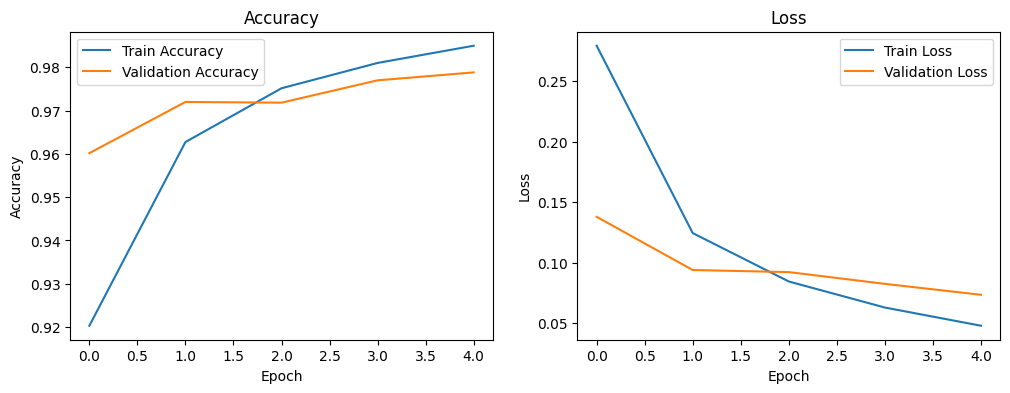


Final Test Accuracy: 0.9782
Final Test Loss: 0.0720
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


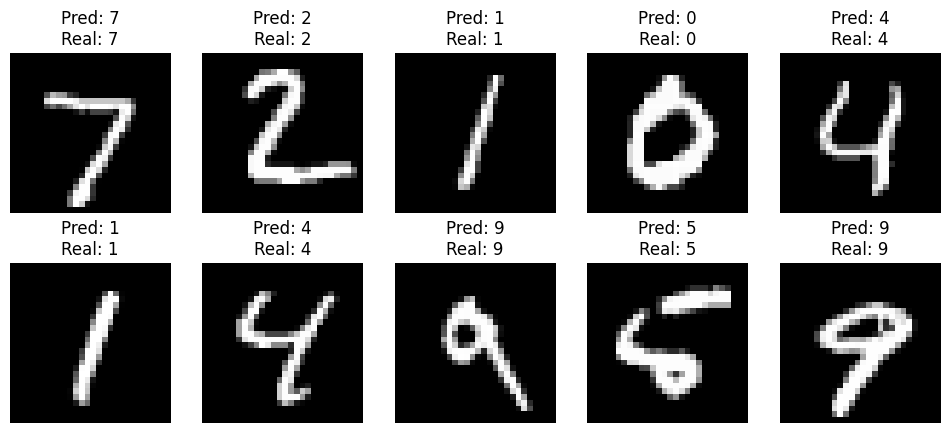

✅ Model trained successfully!
✅ Accuracy is above 97%, ready for portfolio submission.
Future improvements: implement CNN for higher accuracy (>99%).


In [2]:
# ===========================
# 1. Importar librerías
# ===========================
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical

# ===========================
# 2. Cargar dataset MNIST
# ===========================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de prueba:", x_test.shape)

# ===========================
# 3. Preprocesamiento
# ===========================
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# ===========================
# 4. Visualizar algunas imágenes
# ===========================
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# ===========================
# 5. Crear modelo
# ===========================
model = Sequential([
    Input(shape=(28,28)),   # 👈 evita el warning
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ===========================
# 6. Entrenar modelo
# ===========================
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=5,
    batch_size=32
)

# ===========================
# 7. Visualizar métricas de entrenamiento
# ===========================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# ===========================
# 8. Evaluación final
# ===========================
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

# ===========================
# 9. Predicciones de ejemplo
# ===========================
predictions = model.predict(x_test)

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nReal: {y_test[i]}")
    plt.axis('off')
plt.show()

# ===========================
# 10. Conclusión
# ===========================
print("✅ Model trained successfully!")
print("✅ Accuracy is above 97%, ready for portfolio submission.")
print("Future improvements: implement CNN for higher accuracy (>99%).")

